In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [42]:
import plotly.express as px

In [43]:
df = pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [44]:
df.shape

(400, 26)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [46]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [47]:
df.drop(['id'], axis=1, inplace=True)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [48]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [49]:
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [50]:
df.describe() #missing values are there


,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [51]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume          object
white_blood_cell_count      object
red_blood_cell_count        object
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
aanemia                     object
class                       object
dtype: object

In [52]:
#why rbc wbc counts, packed_cell_volume  are objects
df['packed_cell_volume'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [53]:
#\t is there in the data
df['packed_cell_volume']=pd.to_numeric(df['packed_cell_volume'], errors='coerce') #coerce will convert invalid parsing to NaN

In [54]:
df['packed_cell_volume'].unique()

array([44., 38., 31., 32., 35., 39., 36., 33., 29., 28., nan, 16., 24.,
       37., 30., 34., 40., 45., 27., 48., 52., 14., 22., 18., 42., 17.,
       46., 23., 19., 25., 41., 26., 15., 21., 43., 20., 47.,  9., 49.,
       50., 53., 51., 54.])

In [55]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [56]:
df['white_blood_cell_count'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [57]:
#\t is there in the data
df['white_blood_cell_count']=pd.to_numeric(df['white_blood_cell_count'], errors='coerce') #coerce will convert invalid parsing to NaN

In [58]:
df['white_blood_cell_count'].unique()

array([ 7800.,  6000.,  7500.,  6700.,  7300.,    nan,  6900.,  9600.,
       12100.,  4500., 12200., 11000.,  3800., 11400.,  5300.,  9200.,
        6200.,  8300.,  8400., 10300.,  9800.,  9100.,  7900.,  6400.,
        8600., 18900., 21600.,  4300.,  8500., 11300.,  7200.,  7700.,
       14600.,  6300.,  7100., 11800.,  9400.,  5500.,  5800., 13200.,
       12500.,  5600.,  7000., 11900., 10400., 10700., 12700.,  6800.,
        6500., 13600., 10200.,  9000., 14900.,  8200., 15200.,  5000.,
       16300., 12400., 10500.,  4200.,  4700., 10900.,  8100.,  9500.,
        2200., 12800., 11200., 19100., 12300., 16700.,  2600., 26400.,
        8800.,  7400.,  4900.,  8000., 12000., 15700.,  4100.,  5700.,
       11500.,  5400., 10800.,  9900.,  5200.,  5900.,  9300.,  9700.,
        5100.,  6600.])

In [59]:
df['red_blood_cell_count'].unique()

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4.0', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6.0', '5.0', '2.1', '5.6', '2.3',
       '2.9', '2.7', '8.0', '3.3', '3.0', '3', '2.4', '4.8', '\t?', '5.4',
       '6.1', '6.2', '6.3', '5.1', '5.8', '5.5', '5.3', '6.4', '5.7',
       '5.9', '6.5'], dtype=object)

In [60]:
df['red_blood_cell_count']=pd.to_numeric(df['red_blood_cell_count'], errors='coerce') #coerce will convert invalid parsing to NaN
df['red_blood_cell_count'].unique()

array([5.2, nan, 3.9, 4.6, 4.4, 5. , 4. , 3.7, 3.8, 3.4, 2.6, 2.8, 4.3,
       3.2, 3.6, 4.1, 4.9, 2.5, 4.2, 4.5, 3.1, 4.7, 3.5, 6. , 2.1, 5.6,
       2.3, 2.9, 2.7, 8. , 3.3, 3. , 2.4, 4.8, 5.4, 6.1, 6.2, 6.3, 5.1,
       5.8, 5.5, 5.3, 6.4, 5.7, 5.9, 6.5])

In [61]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
aanemia                     object
class                       object
dtype: object

In [62]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']
cat_cols, num_cols

(['red_blood_cells',
  'pus_cell',
  'pus_cell_clumps',
  'bacteria',
  'hypertension',
  'diabetes_mellitus',
  'coronary_artery_disease',
  'appetite',
  'peda_edema',
  'aanemia',
  'class'],
 ['age',
  'blood_pressure',
  'specific_gravity',
  'albumin',
  'sugar',
  'blood_glucose_random',
  'blood_urea',
  'serum_creatinine',
  'sodium',
  'potassium',
  'haemoglobin',
  'packed_cell_volume',
  'white_blood_cell_count',
  'red_blood_cell_count'])

In [63]:
for col in cat_cols:
    print(f'{col} : {df[col].unique()}')

red_blood_cells : [nan 'normal' 'abnormal']
pus_cell : ['normal' 'abnormal' nan]
pus_cell_clumps : ['notpresent' 'present' nan]
bacteria : ['notpresent' 'present' nan]
hypertension : ['yes' 'no' nan]
diabetes_mellitus : ['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronary_artery_disease : ['no' 'yes' '\tno' nan]
appetite : ['good' 'poor' nan]
peda_edema : ['no' 'yes' nan]
aanemia : ['no' 'yes' nan]
class : ['ckd' 'ckd\t' 'notckd']


In [64]:
df['diabetes_mellitus'].replace(to_replace={'yes': 'yes', 'no': 'no', '\tno': 'no', '\tyes': 'yes', ' yes': 'yes'}, inplace=True)

In [65]:
df['diabetes_mellitus'].unique()

array(['yes', 'no', nan], dtype=object)

In [ ]:
df.coronary_artery_disease.replace(to_replace={'yes': 'yes', 'no': 'no', '\tno': 'no'}, inplace=True)

In [67]:
df.coronary_artery_disease.unique()

array(['no', 'yes', nan], dtype=object)

In [71]:
df['class']= df['class'].map({'ckd': 1, 'notckd': 0, 'ckd\t': 1})


In [72]:
df['class']

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: class, Length: 400, dtype: int64

In [73]:
df['class'].unique()

array([1, 0])

In [70]:
for col in cat_cols:
    print(f'{col} : {df[col].unique()}')

red_blood_cells : [nan 'normal' 'abnormal']
pus_cell : ['normal' 'abnormal' nan]
pus_cell_clumps : ['notpresent' 'present' nan]
bacteria : ['notpresent' 'present' nan]
hypertension : ['yes' 'no' nan]
diabetes_mellitus : ['yes' 'no' nan]
coronary_artery_disease : ['no' 'yes' nan]
appetite : ['good' 'poor' nan]
peda_edema : ['no' 'yes' nan]
aanemia : ['no' 'yes' nan]
class : ['ckd' 'ckd\t' 'notckd']


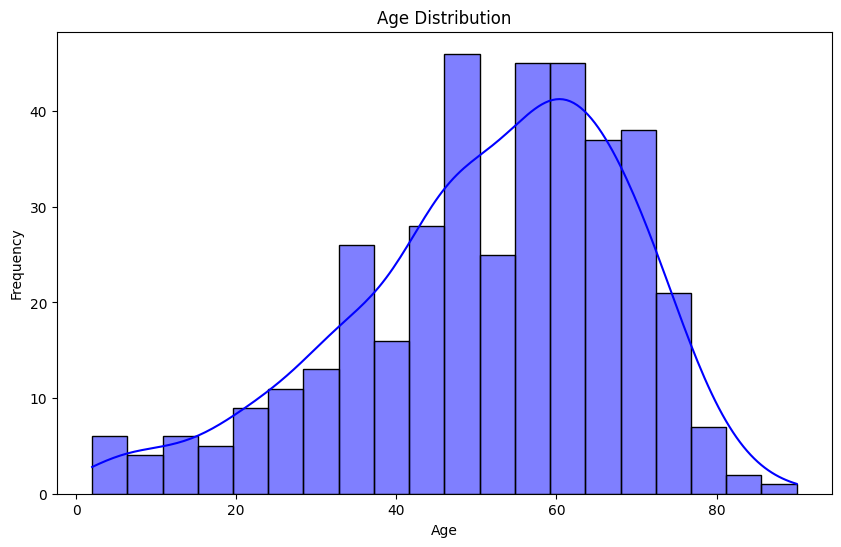

In [75]:
#univariate analysis
plt.figure(figsize=(10,6))
sns.histplot(df['age'].dropna(), bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [76]:
#age is left skewed
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

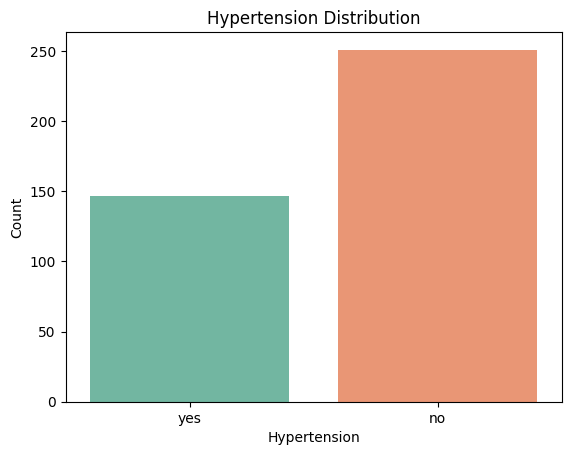

In [77]:
sns.countplot(x='hypertension', data=df, palette='Set2')
plt.title('Hypertension Distribution')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.show()

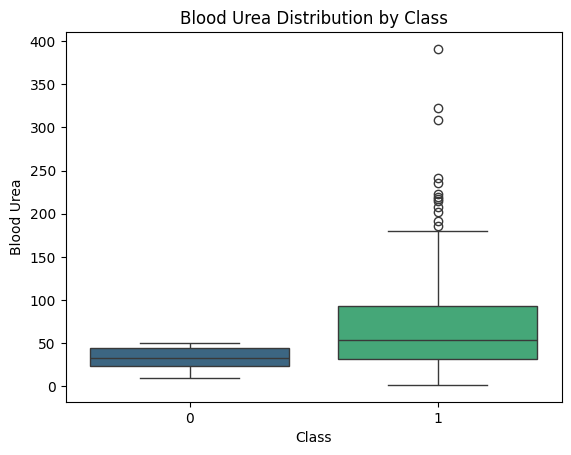

In [80]:
sns.boxplot(x='class', y='blood_urea', data=df, palette='viridis')
plt.title('Blood Urea Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Blood Urea')
plt.show()

In [ ]:
#blood urea is higher in ckd(kidney disease) patients and median value is also higher


<Axes: xlabel='class', ylabel='serum_creatinine'>

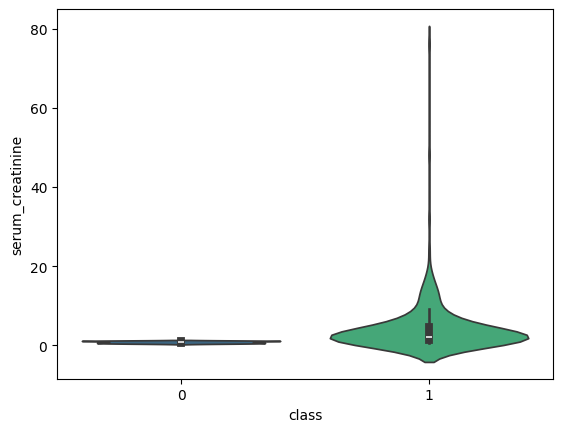

In [81]:
sns.violinplot(x='class', y='serum_creatinine', data=df, palette='viridis')

In [82]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

Text(0.5, 1.0, 'Anemia Distribution')

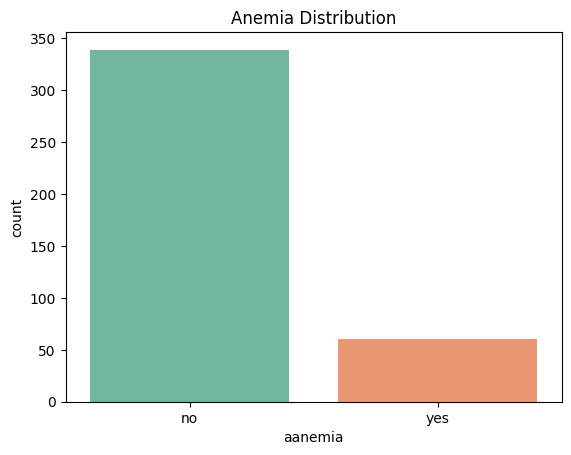

In [84]:
sns.countplot(x = "aanemia", data = df, palette = "Set2")
plt.title('Anemia Distribution')

In [ ]:
#most patients are not anemic

In [86]:
df.appetite.value_counts()

appetite
good    317
poor     82
Name: count, dtype: int64

<Axes: ylabel='count'>

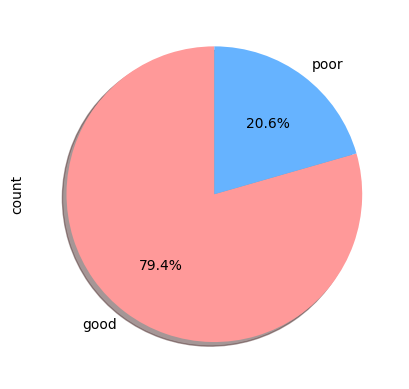

In [87]:
df.appetite.value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True, colors=['#ff9999','#66b3ff'])

<Axes: ylabel='count'>

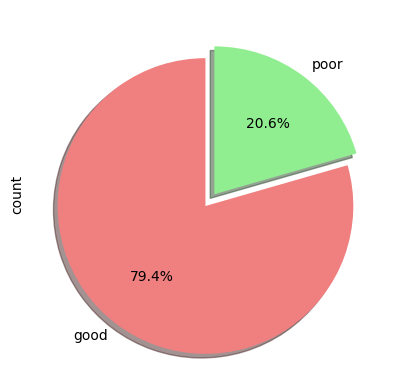

In [90]:
df.appetite.value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True, colors=['lightcoral','lightgreen'], explode=(0.1, 0))

In [91]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [92]:
df.pus_cell_clumps.value_counts()

pus_cell_clumps
notpresent    354
present        42
Name: count, dtype: int64

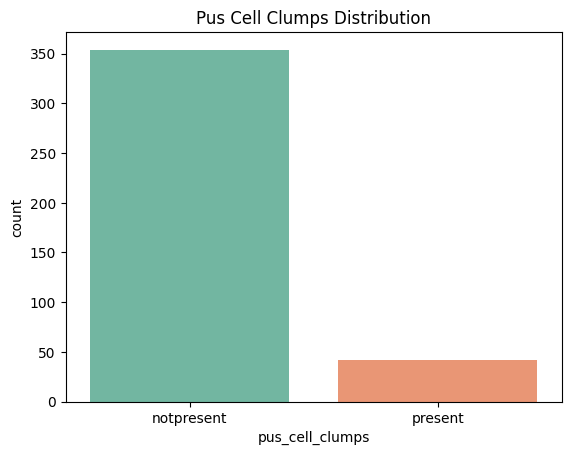

In [94]:
sns.countplot(x = "pus_cell_clumps", data = df, palette = "Set2")
plt.title('Pus Cell Clumps Distribution')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

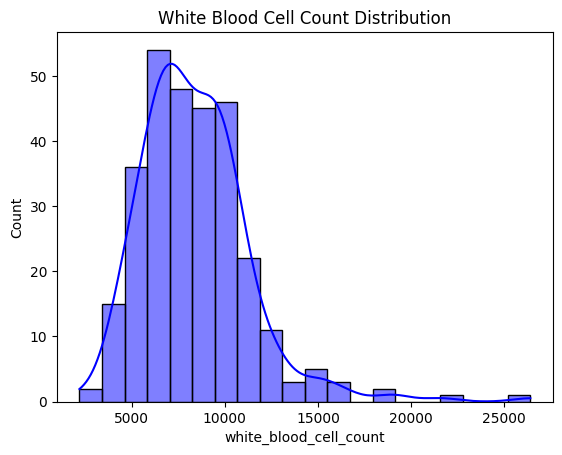

In [95]:
sns.histplot(df["white_blood_cell_count"].dropna(), bins=20, kde=True, color='blue')
plt.title('White Blood Cell Count Distribution')
plt.show

In [ ]:
#donut chart-- pie chart with a hole in the middle
#by specifying wedgeprops with a white color and a width of 0.3, we create the hole in the middle of the pie chart.

df.diabetes_mellitus.value_counts()



diabetes_mellitus
no     261
yes    137
Name: count, dtype: int64

<Axes: ylabel='count'>

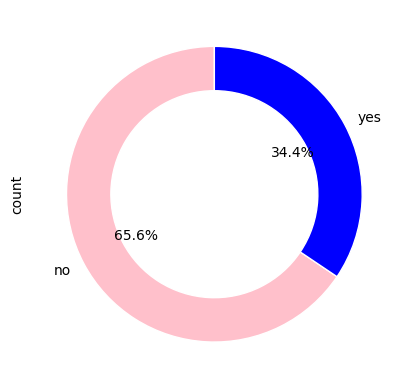

In [101]:
df.diabetes_mellitus.value_counts().plot.pie(autopct='%1.1f%%', startangle=90,  colors=['pink','blue'], wedgeprops=dict(width=0.3, edgecolor='w'))

<Axes: xlabel='coronary_artery_disease', ylabel='count'>

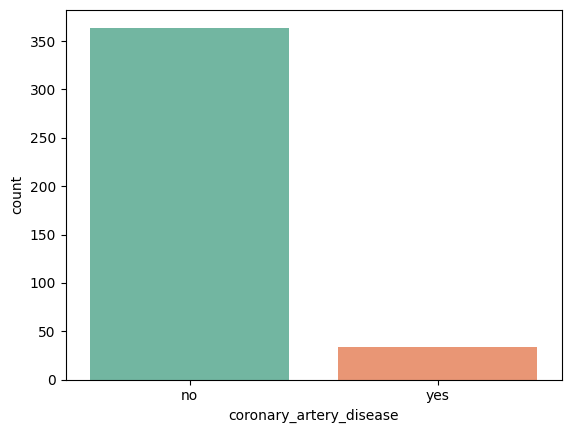

In [102]:
sns.countplot(x = "coronary_artery_disease", data = df, palette = "Set2")

<Axes: xlabel='peda_edema', ylabel='count'>

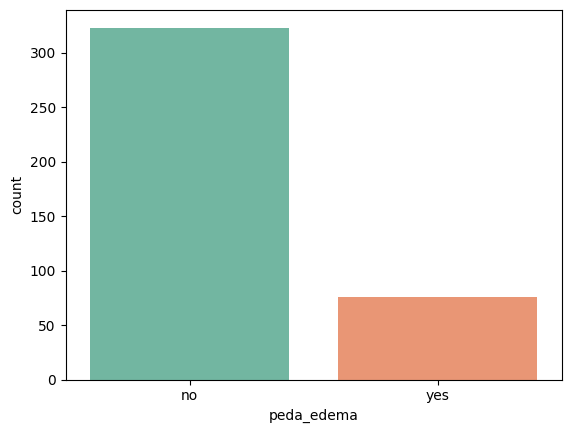

In [103]:
sns.countplot(x = "peda_edema", data = df, palette = "Set2")

<Axes: xlabel='bacteria', ylabel='count'>

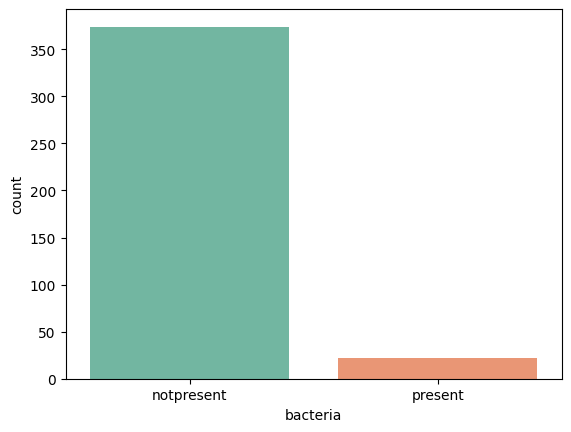

In [104]:
sns.countplot(x = "bacteria", data = df, palette = "Set2")

<Axes: xlabel='age', ylabel='blood_pressure'>

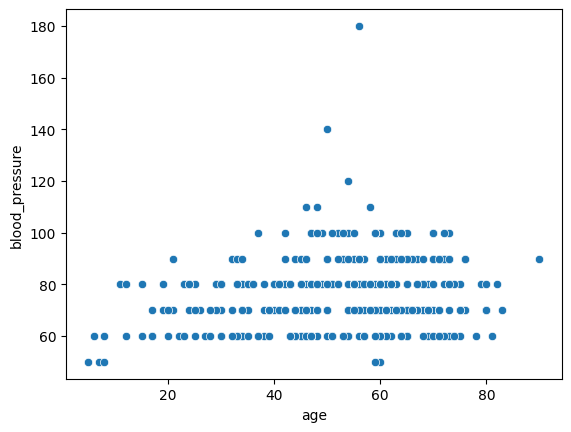

In [108]:
#bivariate analysis
sns.scatterplot(x = "age", y = "blood_pressure",  data = df, palette = "Set2")

In [ ]:
#as age is increasing order, blood pressure is also increasing with age

<Axes: xlabel='age', ylabel='blood_pressure'>

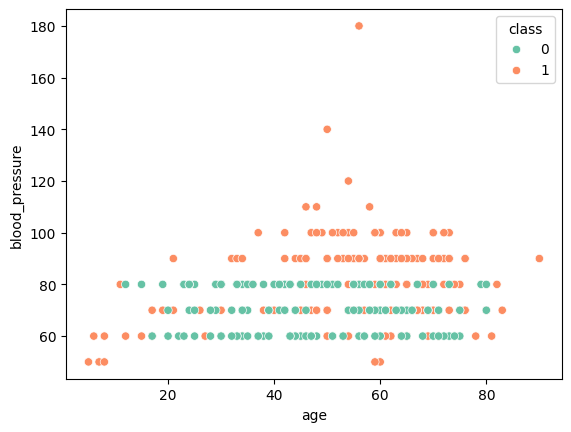

In [110]:
sns.scatterplot(x = "age", y = "blood_pressure",  hue = "class", data = df, palette = "Set2")

<Axes: xlabel='diabetes_mellitus', ylabel='albumin'>

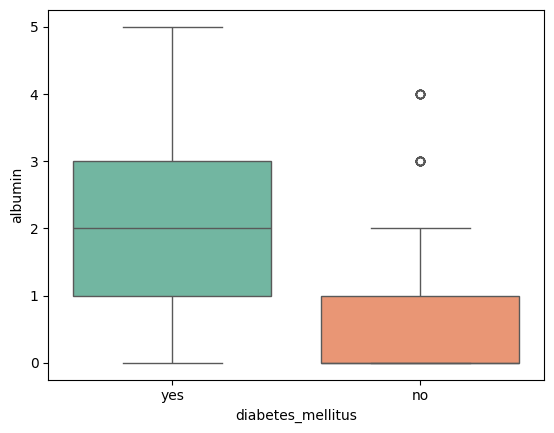

In [112]:
sns.boxplot(x = "diabetes_mellitus", y = "albumin", data = df, palette = "Set2")

<Axes: xlabel='diabetes_mellitus', ylabel='albumin'>

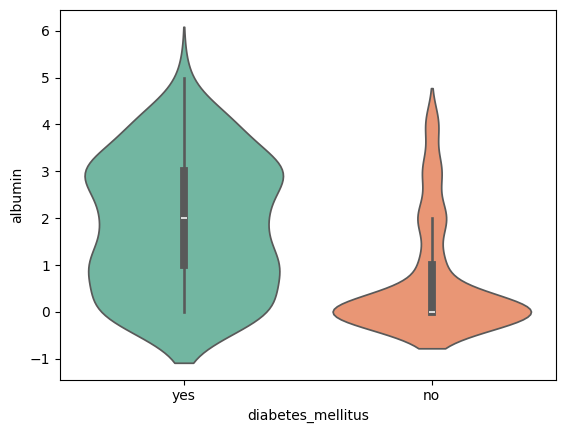

In [113]:
sns.violinplot(x = "diabetes_mellitus", y = "albumin", data = df, palette = "Set2")

In [114]:
#stacked barchart
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [116]:
#diabetes mellitus and hypertension
df['diabetes_mellitus'].unique()

array(['yes', 'no', nan], dtype=object)

In [117]:
df['hypertension'].unique()

array(['yes', 'no', nan], dtype=object)

In [ ]:
pd.crosstab(df['diabetes_mellitus'], df['hypertension'])
#summarises the data

hypertension,no,yes
diabetes_mellitus,,
no,220,41
yes,31,106


Text(0.5, 1.0, 'Stacked Bar Chart of Diabetes Mellitus and Hypertension')

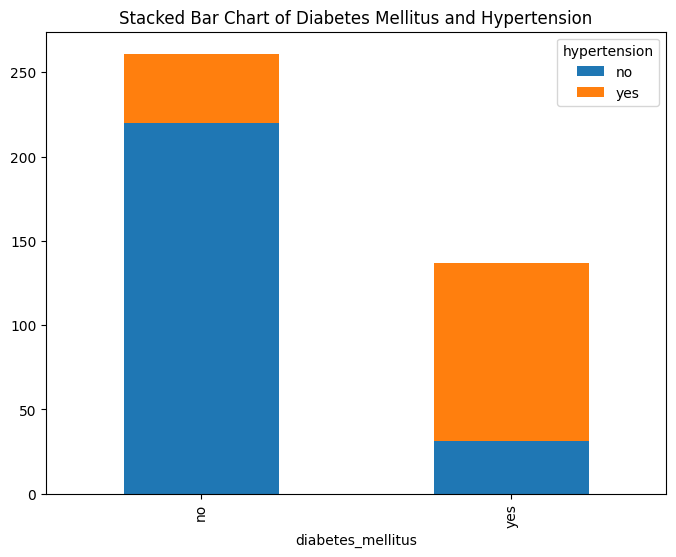

In [121]:
diabetes_hypertension = pd.crosstab(df['diabetes_mellitus'], df['hypertension'])
diabetes_hypertension.plot(kind='bar', stacked=True,  figsize=(8, 6))
plt.title('Stacked Bar Chart of Diabetes Mellitus and Hypertension')

In [122]:
#multivariate analysis
cols = ['age', 'blood_pressure', 'blood_glucose_random', 'serum_creatinine', 'class']
df[cols]

,age,blood_pressure,blood_glucose_random,serum_creatinine,class
0,48.0,80.0,121.0,1.2,1
1,7.0,50.0,NaN,0.8,1
2,62.0,80.0,423.0,1.8,1
3,48.0,70.0,117.0,3.8,1
4,51.0,80.0,106.0,1.4,1
...,...,...,...,...,...
395,55.0,80.0,140.0,0.5,0
396,42.0,70.0,75.0,1.2,0
397,12.0,80.0,100.0,0.6,0
398,17.0,60.0,114.0,1.0,0


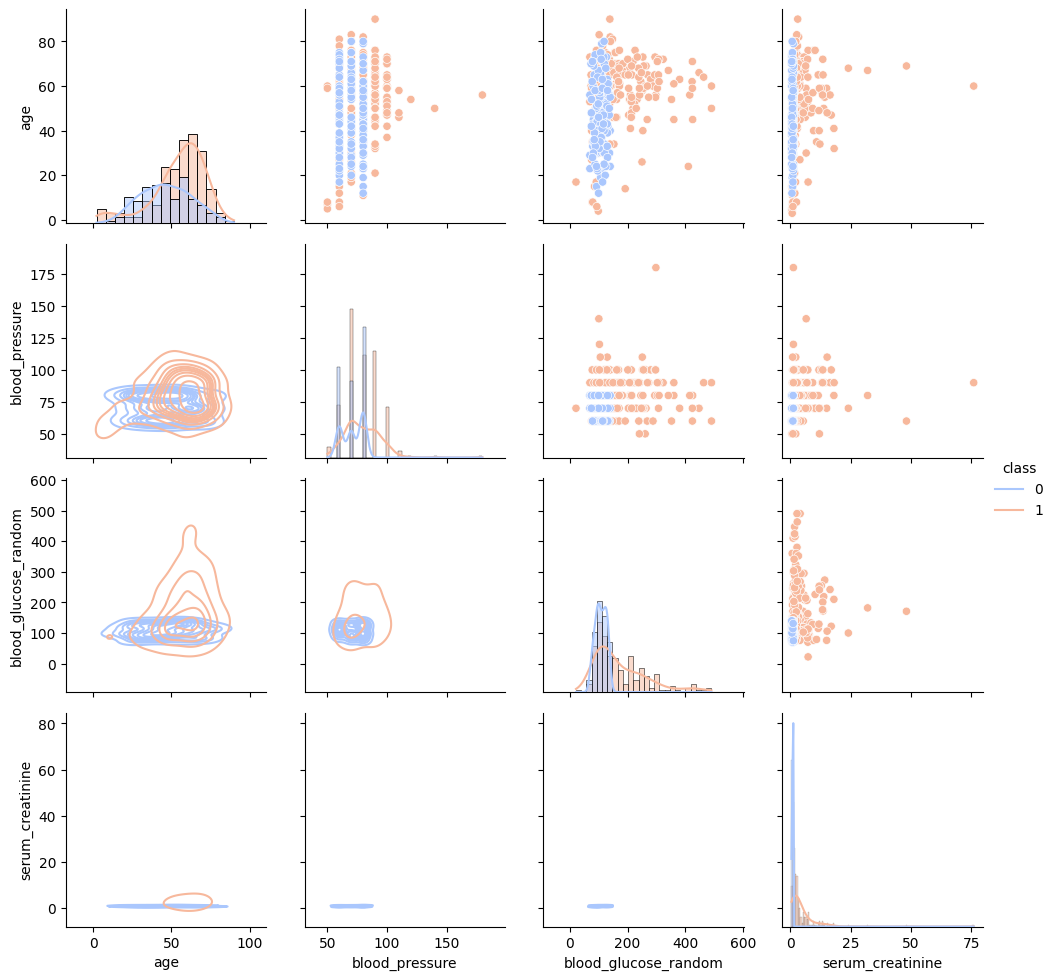

In [ ]:
#customised pairplot
g = sns.PairGrid(df[cols], hue = 'class', palette = 'coolwarm')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, cmap = 'Blues')
g.map_diag(sns.histplot, kde = True)
g.add_legend()
plt.show()

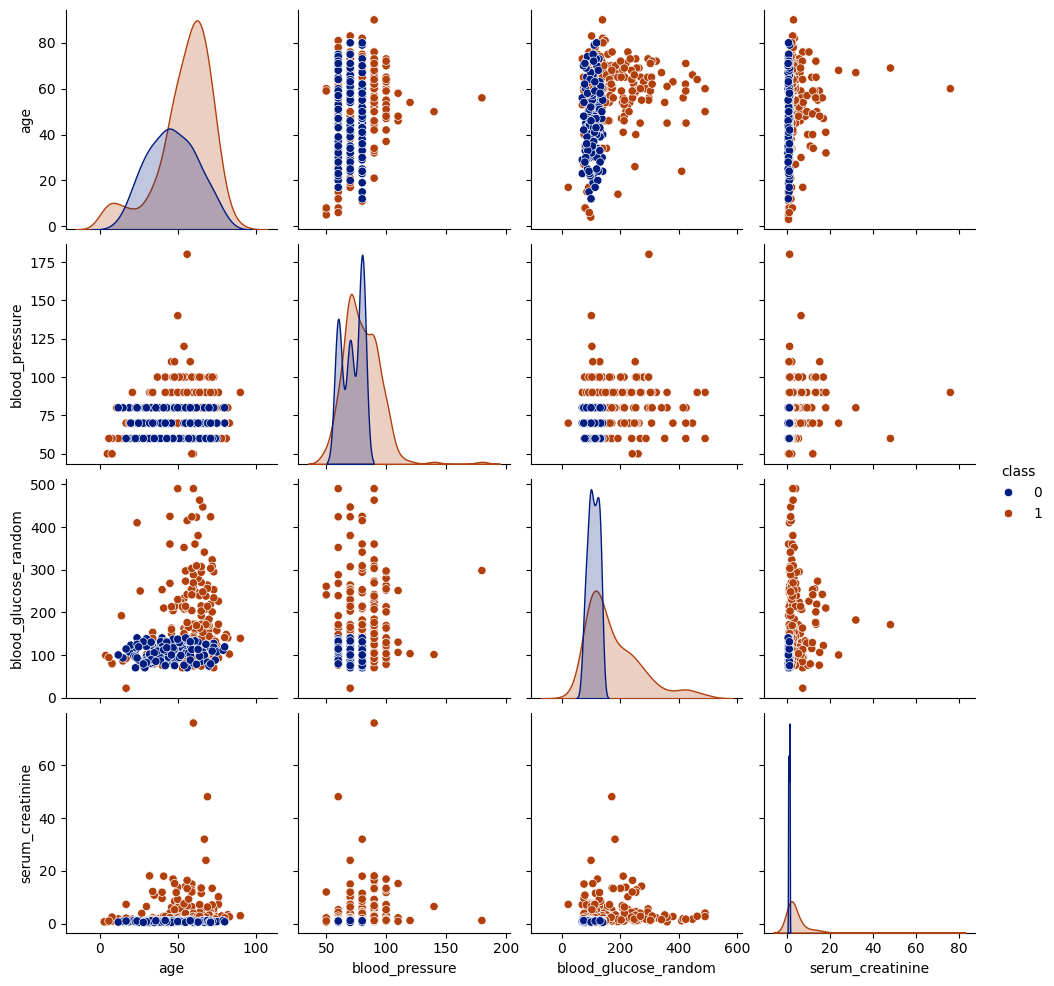

In [128]:
sns.pairplot(df[cols], hue = 'class', palette = 'dark')
plt.show()

In [129]:
df.corr(numeric_only=True)

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,class
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896,0.227268
blood_pressure,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936,0.294077
specific_gravity,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476,-0.732163
albumin,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437,0.627090
sugar,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448,0.344070
blood_glucose_random,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541,0.419672
blood_urea,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087,0.380605
serum_creatinine,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852,0.299969
sodium,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873,-0.375674
potassium,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.163182,-0.105576,-0.158309,0.084541


<Axes: >

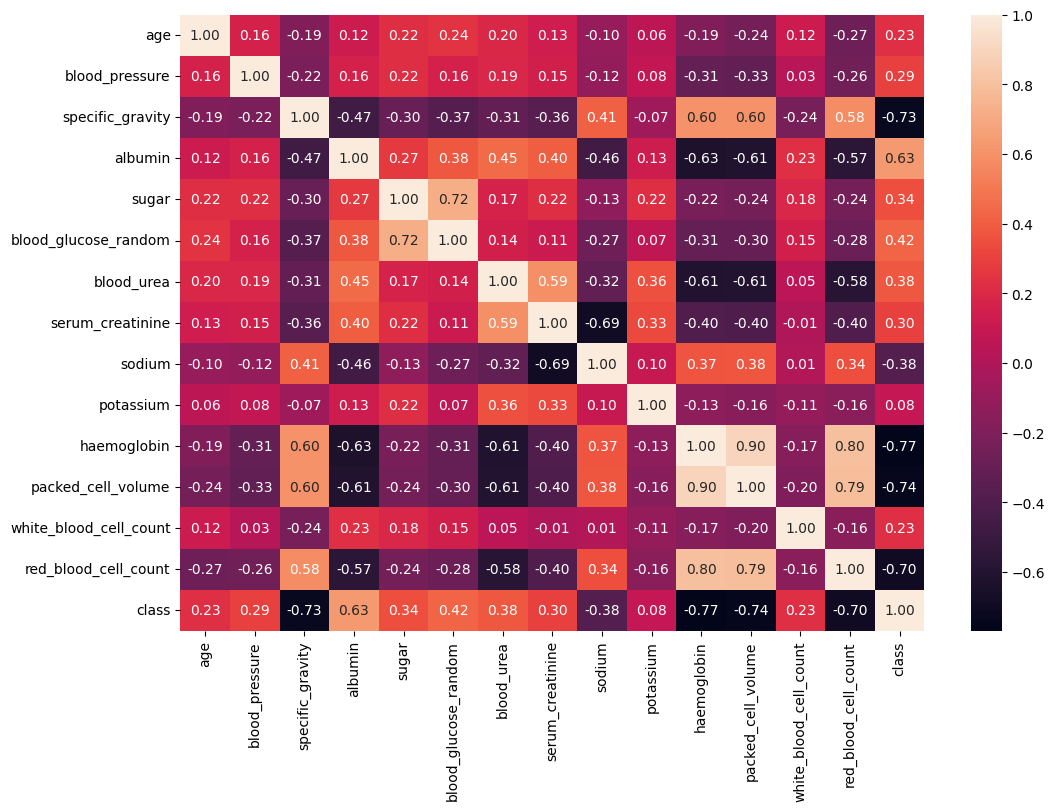

In [132]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='rocket', fmt='.2f')

<Axes: xlabel='diabetes_mellitus', ylabel='age'>

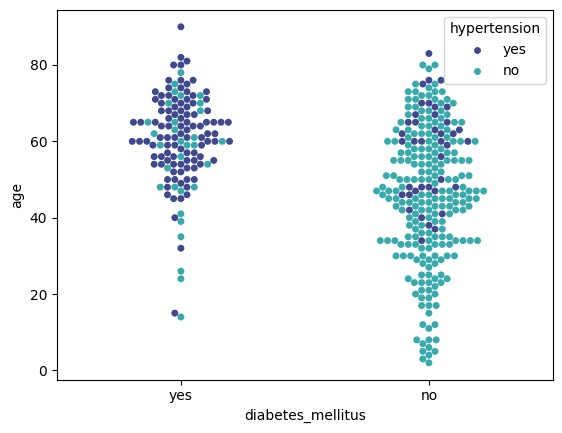

In [134]:
sns.swarmplot(x = "diabetes_mellitus", y = "age",hue = "hypertension" ,data = df, palette = "mako")

In [ ]:
#swarm plot allows u to see the overlapped points

In [ ]:
#interactive visualization
px.scatter(df, x = "age", y = "blood_pressure", color = "class",  title = "Blood Pressure vs Age")

In [137]:
px.scatter(df, x = "age", y = "blood_pressure", color = "class", hover_data=["serum_creatinine", "haemoglobin"], title = "Blood Pressure vs Age")

In [138]:
#3d plt
fig = px.scatter_3d(df, x= "age", y="blood_pressure", z="serum_creatinine", color="class", title = "Blood Pressure vs Age vs Serum Creatinine")
fig.show()

In [141]:
import plotly.graph_objects as go 
corr = df.corr(numeric_only=True)
fig2 = go.Figure(data = go.Heatmap(z= corr.values, x= corr.columns, y= corr.index))
fig2.show()

In [142]:
fig = px.scatter_3d(df, x= "age", y="blood_pressure", z="serum_creatinine", color="haemoglobin", title = "Blood Pressure vs Age vs Serum Creatinine")
fig.show()

In [144]:
df.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [145]:
#fill all num columns with median
median_values = df[num_cols].median()
df[num_cols]= df[num_cols].fillna(median_values)

In [146]:
df.isnull().sum()

age                          0
blood_pressure               0
specific_gravity             0
albumin                      0
sugar                        0
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random         0
blood_urea                   0
serum_creatinine             0
sodium                       0
potassium                    0
haemoglobin                  0
packed_cell_volume           0
white_blood_cell_count       0
red_blood_cell_count         0
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [150]:
mode = df.mode().iloc[0]

In [151]:
df[cat_cols] = df[cat_cols].fillna(mode)

In [153]:
df.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [154]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
aanemia                     object
class                        int64
dtype: object

In [156]:
#few columns are object -- convert object to numerical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder

LabelEncoder()

In [157]:
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [158]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells              int64
pus_cell                     int64
pus_cell_clumps              int64
bacteria                     int64
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                 int64
diabetes_mellitus            int64
coronary_artery_disease      int64
appetite                     int64
peda_edema                   int64
aanemia                      int64
class                        int64
dtype: object

In [ ]:
X = df.drop("class", axis = 1)
y = df["class"]

#now we can build our required model